In [2]:
import numpy
import pandas
from sklearn import svm
import matplotlib.pyplot as pyplot

data = pandas.read_csv('svm_dataset_2.csv')

In [10]:
data

,x1,x2,y
0,7.0,20,-1
1,8.0,12,-1
2,9.0,19,-1
3,10.0,17,-1
4,11.0,15,-1
5,13.0,14,-1
6,14.0,12,-1
7,15.0,14,-1
8,15.0,17,-1
9,16.0,16,-1


In [32]:
X1 = data['x1']
X2 = data['x2']

X_train = numpy.array(list(zip(X1, X2)))
y_train = data['y'].values

print('X_train')
X_train

print('y_train')
y_train

'''
== WARN == 
not well commented here!
check what this section does better.
'''
# svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier = svm.SVC(kernel='poly', C=10)
# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
svm_classifier.fit(X_train, y_train)

X_train
y_train


/Users/nolansmac/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
# color everything!
color_ls = []
for k in y_train:
	if k == 1:
		color_ls.append('b')
	else:
		color_ls.append('r')

		# label everything!
label = []
for k in y_train:
	if k == 1:
		label.append('😄')
	else:
		label.append('😦')

array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

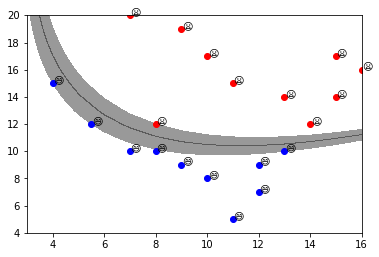

In [65]:
def plot_decision_boundary(clf, X, y):
	x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
	x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

	xx1, xx2 = numpy.meshgrid(
		numpy.arange(x1_min, x1_max), 
		numpy.arange(x2_min, x2_max)
	)

	Z = clf.decision_function(
		numpy.array(
			[xx1.ravel(), 
			 xx2.ravel()]
		).T
	).reshape(xx1.shape)

	pyplot.contourf(
		xx1,
		xx2,
		Z,
		colors='k',
		levels=[-1, 0, 1],
		alpha=0.4,
		linestyles=['--', '-', '--']
	)

	pyplot.xlim(xx1.min(), xx1.max())
	pyplot.ylim(xx2.min(), xx2.max())

plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
	pyplot.scatter(i, j, c = color_ls[k])
	pyplot.text(i+0.02, j+0.02, label[k])

svm_classifier.support_vectors_